In [1]:
pip install nibabel

  Obtaining dependency information for nibabel from https://files.pythonhosted.org/packages/77/3f/ce43b8c2ccc4a7913a87c4d425aaf0080ea3abf947587e47dc2025981a17/nibabel-5.2.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB 393.8 kB/s eta 0:00:09
   - -------------------------------------- 0.1/3.3 MB 655.4 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/3.3 MB 1.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.3/3.3 MB 1.3 MB/s eta 0:00:03
   ----- ---------------------------------- 0.5/3.3 MB 1.5 MB/s eta 0:00:02
   ------ --------------------------------- 0.5/3.3 MB 1.6 MB/s eta 0:00:02
   ------- -------------------------------- 0.7/3.3 MB 1.7 MB/s eta 0:00:02
   --------- ------------------------------ 0.7/3.3 MB 1.7

In [2]:
pip install itkwidgets

  Obtaining dependency information for itkwidgets from https://files.pythonhosted.org/packages/d1/9d/1a64e834c17ffe615c8f80d8367f0beeafd07338efccf5be9733d0f770da/itkwidgets-0.32.6-py2.py3-none-any.whl.metadata
  Obtaining dependency information for itk-core>=5.3.0 from https://files.pythonhosted.org/packages/ff/a8/e2666c5e784c3a509d2c0a6e3a04cf24377d7ab0f08ecea6654b7a6bbeff/itk_core-5.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for itk-filtering>=5.3.0 from https://files.pythonhosted.org/packages/b9/ea/736e5d15a84b807503e615f1c1a647ddd04cf87fdb055a9001f634b43119/itk_filtering-5.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for itk-numerics>=5.3.0 from https://files.pythonhosted.org/packages/eb/92/5c322687e6106fcf78febb1024344c8ffc90556a4ab186707ccf7b5f7c90/itk_numerics-5.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for itk-meshtopolydata>=0.10 from https://files.pythonhosted.org/packages/5a/36/8929aa

In [3]:
import numpy as np
import nibabel as nib #read/write access to some common neuroimaging file formats
import itk            #jupyter widgets to visualise images in 2d and 3d
import itkwidgets
from ipywidgets import interact,interactive,IntSlider,ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [5]:
#define the image path and load the data
image_path="C:/Users/user/Downloads/ADNI1_Screening 1.5T/ADNI/067_S_0257/MPR__GradWarp__B1_Correction__N3__Scaled/2006-05-19_09_01_53.0/I34824/ADNI_067_S_0257_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061229180908303_S14730_I34824.nii"
image_obj=nib.load(image_path)
print(f'Type of the image {type(image_obj)}.')


Type of the image <class 'nibabel.nifti1.Nifti1Image'>.


In [6]:
#extract data as numpy array
image_data=image_obj.get_fdata()
type(image_data)

numpy.memmap

In [7]:
#get the image shhape and print it out
height, width, depth=image_data.shape
print(f"The image object has the following dimensions:\nheight={height}\nwidth={width}\ndepth={depth}\n.")

The image object has the following dimensions:
height=192
width=192
depth=160
.


plotting layer:Layer 63 of Image


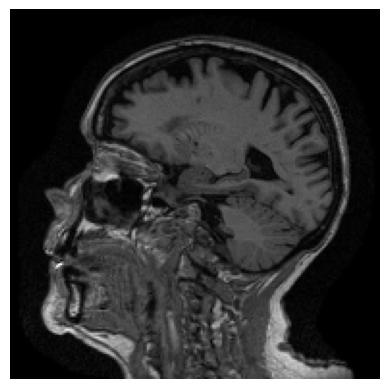

In [8]:
#select random layer number 
maxval=180
i=np.random.randint(0,maxval)
print(f'plotting layer:Layer {i} of Image')
plt.imshow(image_data[:, :, i],cmap='gray')
plt.axis('off')
plt.show()


In [11]:
# Transpose the image data to get the top view
top_view_data = np.transpose(image_data, (1, 0, 2))

# Display the top view using itkwidgets
itkwidgets.view(top_view_data)


TraitError: label_image_weights shape expected to have 1 components, but got () components

IntText(value=0, description='Enter Layer Number:')

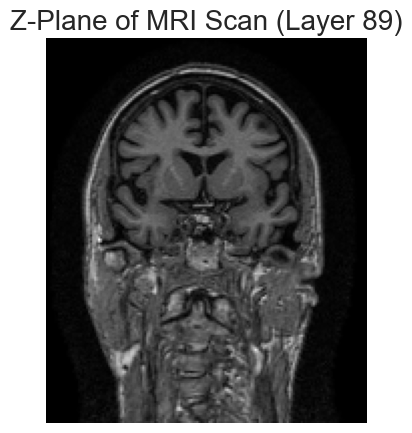

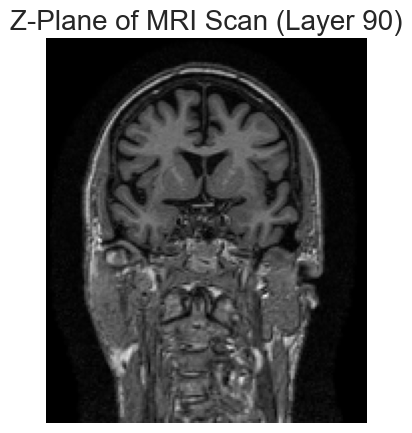

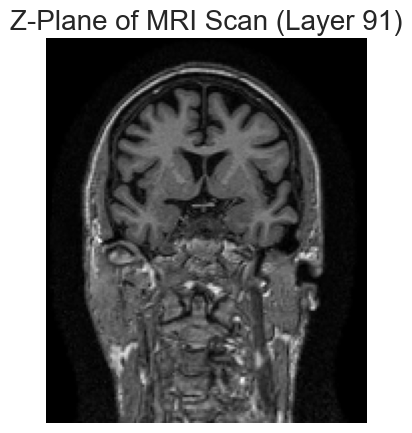

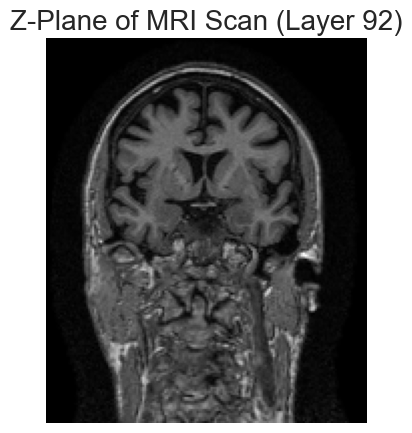

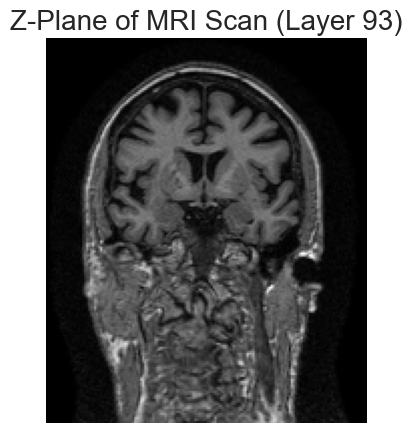

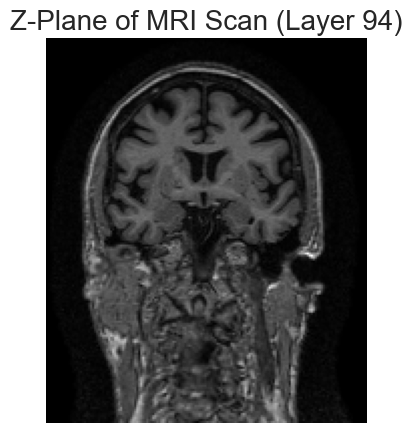

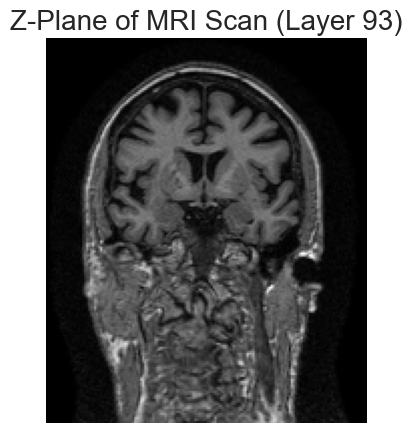

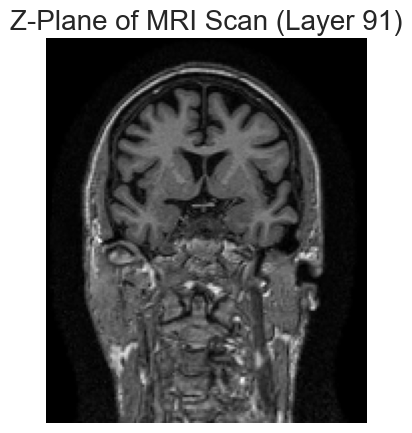

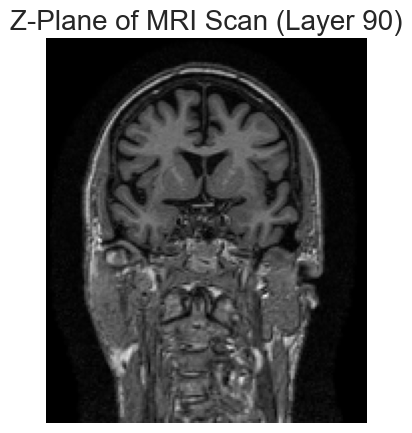

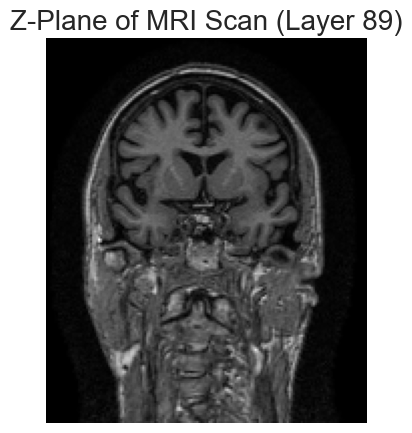

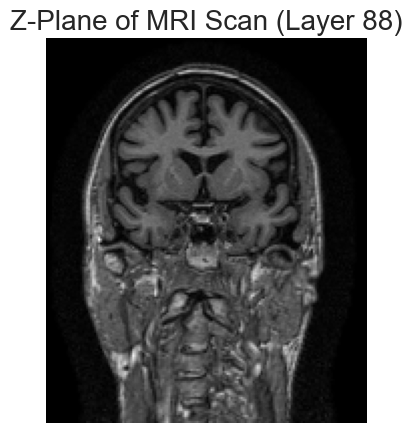

In [10]:
import ipywidgets as widgets

def plot_y_plane(layer):
    plt.figure(figsize=(5, 5))
    plt.imshow(image_data[:, layer, :], cmap='gray')
    plt.title(f'Z-Plane of MRI Scan (Layer {layer})', family='Arial', fontsize=20)
    plt.axis('off')
    plt.show()

# Create a text box widget for user input
layer_textbox = widgets.IntText(description='Enter Layer Number:', min=0, max=image_data.shape[1]-1, value=0)

# Define a function to handle user input and plot the y-plane
def handle_layer_change(change):
    layer = change.new
    plot_y_plane(layer)

# Connect the text box widget to the function
layer_textbox.observe(handle_layer_change, names='value')

# Display the text box widget
display(layer_textbox)


IntText(value=0, description='Enter Layer Number:')

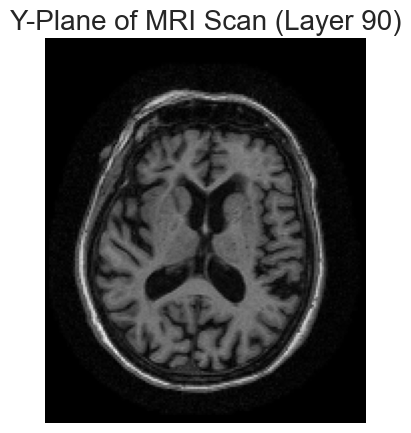

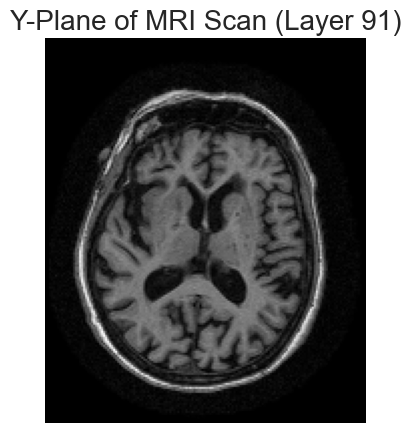

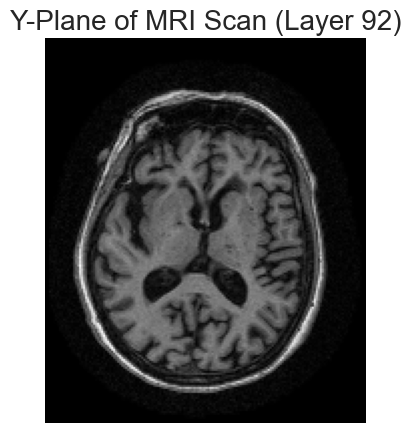

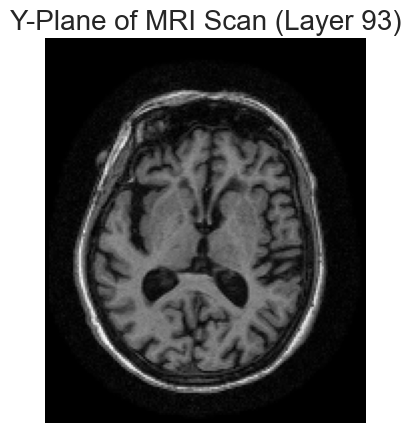

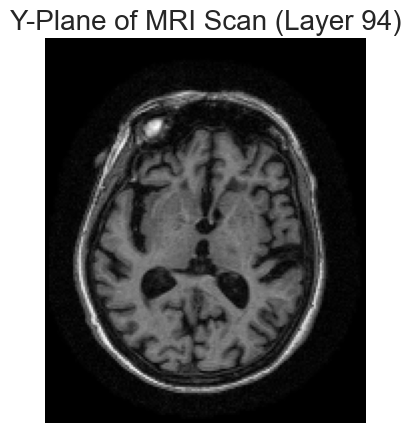

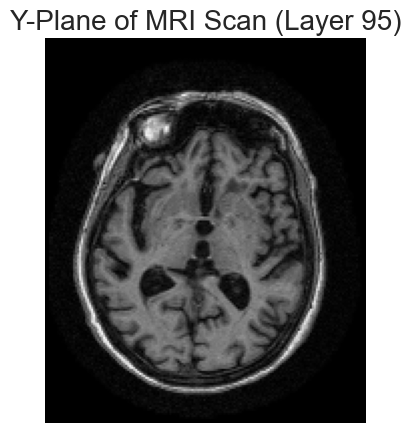

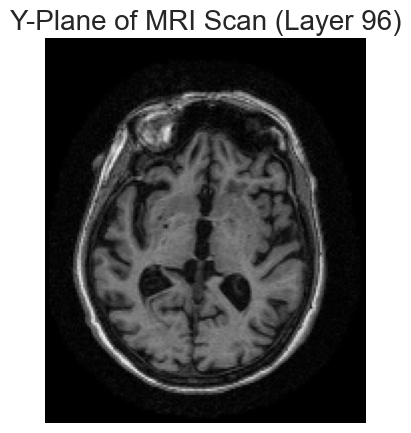

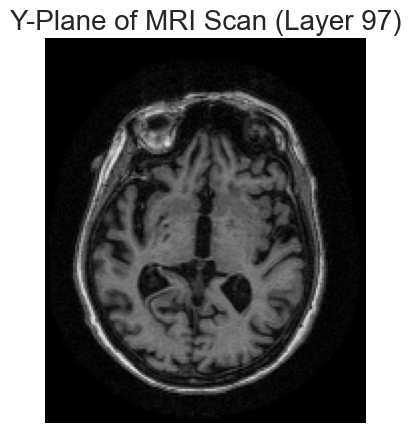

In [10]:
import ipywidgets as widgets

def plot_z_plane(layer):
    plt.figure(figsize=(5, 5))
    plt.imshow(image_data[layer, :, :], cmap='gray')
    plt.title(f'Y-Plane of MRI Scan (Layer {layer})', family='Arial', fontsize=20)
    plt.axis('off')
    plt.show()

# Create a text box widget for user input
layer_textbox = widgets.IntText(description='Enter Layer Number:', min=0, max=image_data.shape[0]-1, value=0)

# Define a function to handle user input and plot the z-plane
def handle_layer_change(change):
    layer = change.new
    plot_z_plane(layer)

# Connect the text box widget to the function
layer_textbox.observe(handle_layer_change, names='value')

# Display the text box widget
display(layer_textbox)
